# 1차 데이터 가공 기준 분석

## 분석준비

3.10.8


Text(0.5, 1.0, '한글 테스트')

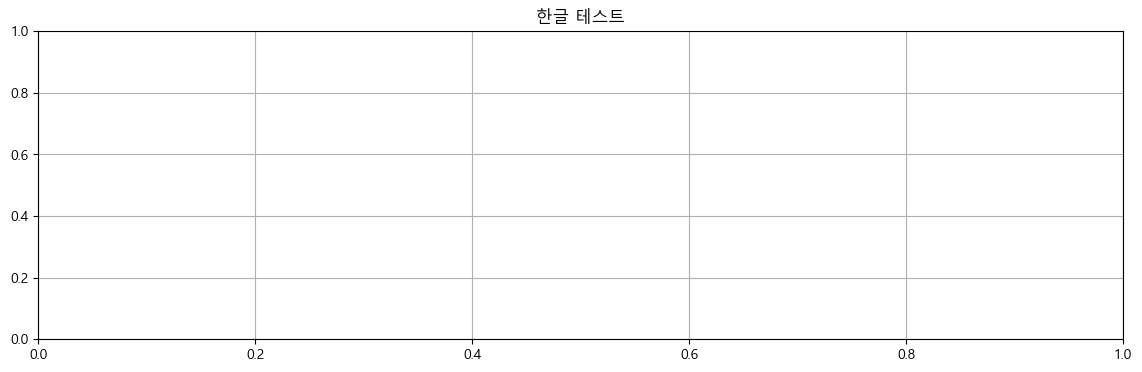

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from tqdm import tqdm

from platform import python_version
print(python_version())

# 그래프에 한글 폰트 설정
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False

# 그래프 크기 설정
rcParams["figure.figsize"] = (10,3)

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)


font_path = 'C:/Windows/Fonts/Malgun.ttf'
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

# matplotlib 한글 출력 확인용 테스트
plt.rcParams["font.family"] = fontname
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글 테스트')

### 브랜드 워드클라우드 생성

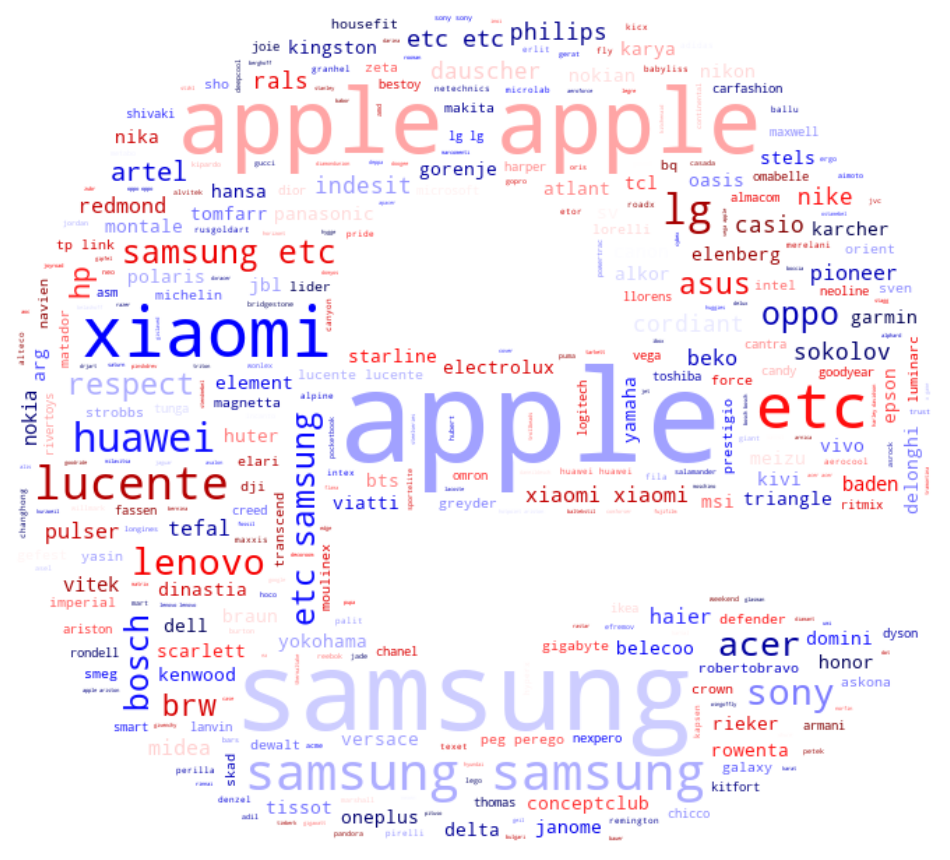

In [6]:
df = pd.read_csv('1207_top_10_EB_data.csv', low_memory = False)

from wordcloud import WordCloud, STOPWORDS
    
import numpy as np
from PIL import Image

df['brand'].to_csv('brand_t.txt',index= False)

with open('brand_t.txt', 'rt', encoding = 'utf-8') as f:
    text = f.read()
    
from collections import Counter
text_counter = Counter(text)
text_counter.most_common(10)

text_bin = pd.Series(text)
text_bin.value_counts()[:10]

wc = WordCloud(background_color='white', 
               font_path= font_path,
               max_words=2000)
wc.generate_from_frequencies(dict(text_counter))

with open('brand_t.txt', 'rt', encoding = 'utf-8') as f:
    text1 = f.read()
    
mask = np.array(Image.open('E image.JPG'))

stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(background_color='white', colormap='seismic', max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text1)

default_colors = wc.to_array()

wc.generate_from_text(text1)
plt.figure(figsize=(12,12))

plt.imshow(wc, interpolation='bilinear')

plt.axis('off')
plt.show()

## 이벤트 타입별 데이터 bar graph

Text(0, 0.5, 'Number')

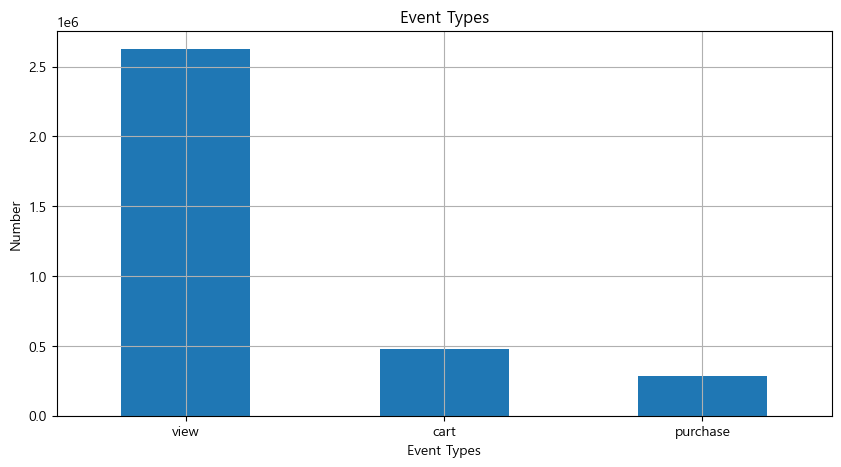

In [15]:
#누적 구입 금액 기준 Top 10% 유저 data 불러오기
df = pd.read_csv('top_10_EB_data.csv', low_memory = False)

#필요없는 column 제거
df.drop(['Unnamed: 0', 'category_code_4', 'user_top_10'], axis=1, inplace = True)

#event type별 분류
count_event_type = df['event_type'].value_counts()
count_event_type

#bar graph 생성
ax = count_event_type.plot.bar(rot=0, figsize=(10,5), title = 'Event Types')
ax.set_xlabel("Event Types")
ax.set_ylabel("Number")

## Purchase 기준 컬럼별 Count TOP 10

### User Session

Text(0, 0.5, 'Purchase Count')

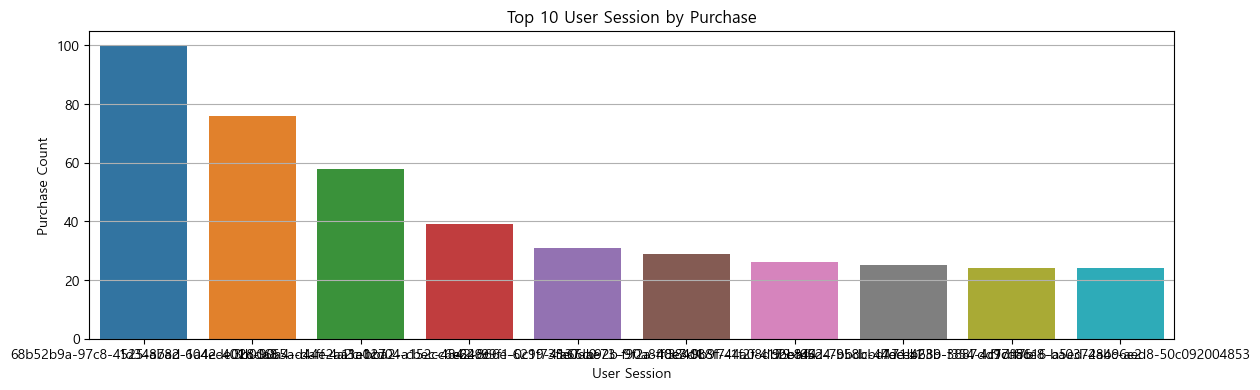

In [16]:
# Purchase 별 User_Session Top 10
purchase = df.query('event_type=="purchase"')
top10_user_session_purchase = purchase['user_session'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_session_purchase_DF = pd.DataFrame()
top10_user_session_purchase_DF['user_session'] = top10_user_session_purchase.index
top10_user_session_purchase_DF['count'] = top10_user_session_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_session_purchase_DF,x='user_session',y='count')
ax.set_title('Top 10 User Session by Purchase')
ax.set_xlabel('User Session')
ax.set_ylabel('Purchase Count')

### User ID

Text(0, 0.5, 'Cart Count')

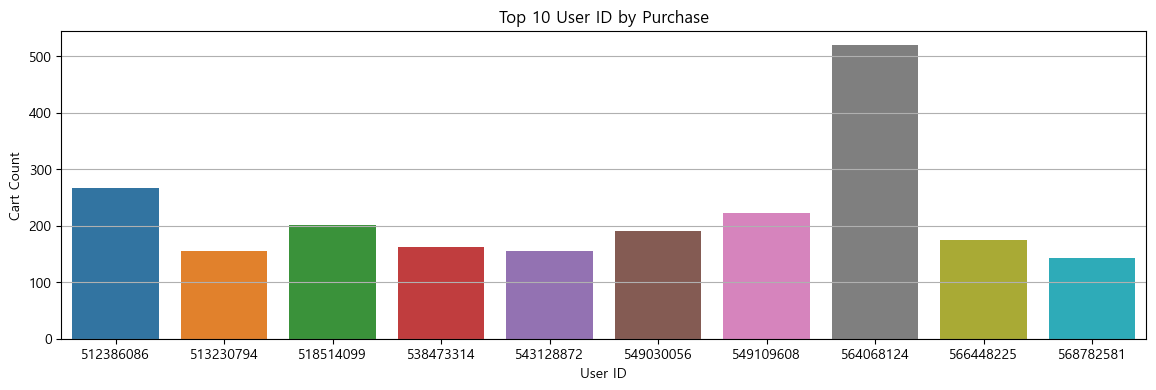

In [39]:
# Purchase 별 User_ID Top 10
purchase = df.query('event_type=="purchase"')
top10_user_id_purchase = purchase['user_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_id_purchase_DF = pd.DataFrame()
top10_user_id_purchase_DF['user_id'] = top10_user_id_purchase.index
top10_user_id_purchase_DF['count'] = top10_user_id_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_id_purchase_DF,x='user_id',y='count')
ax.set_title('Top 10 User ID by Purchase')
ax.set_xlabel('User ID')
ax.set_ylabel('Cart Count')

### Category Code 1

Text(0, 0.5, 'Purchase Count')

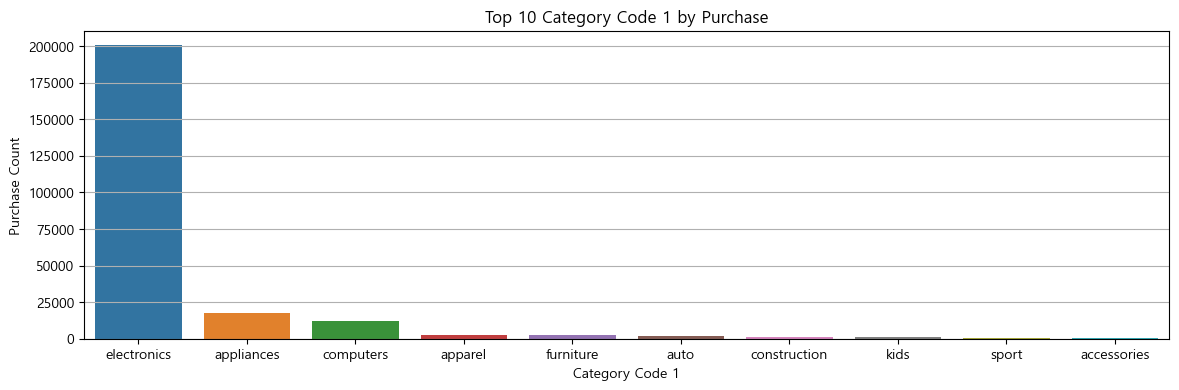

In [18]:
# purchase 별 Category_code top 10
purchase = df.query('event_type=="purchase"')
top10_category_code_1_purchase = purchase['category_code_1'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_category_code_1_purchase_DF = pd.DataFrame()
top10_category_code_1_purchase_DF['category_code_1'] = top10_category_code_1_purchase.index
top10_category_code_1_purchase_DF['count'] = top10_category_code_1_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_category_code_1_purchase_DF,x='category_code_1',y='count')
ax.set_title('Top 10 Category Code 1 by Purchase')
ax.set_xlabel('Category Code 1')
ax.set_ylabel('Purchase Count')

### Product ID

Text(0, 0.5, 'Puchase Count')

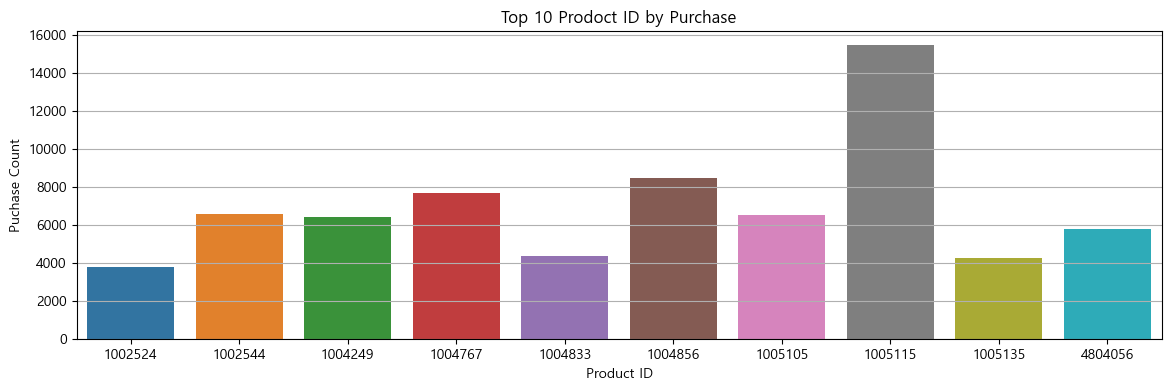

In [19]:
# purchase 별 Product_id top 10
purchase = df.query('event_type=="purchase"')
top10_product_id_purchase = purchase['product_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_product_id_purchase_DF = pd.DataFrame()
top10_product_id_purchase_DF['brand'] = top10_product_id_purchase.index
top10_product_id_purchase_DF['count'] = top10_product_id_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_product_id_purchase_DF,x='brand',y='count')
ax.set_title('Top 10 Prodoct ID by Purchase')
ax.set_xlabel('Product ID')
ax.set_ylabel('Puchase Count')

### Brand

Text(0, 0.5, 'Purchase Count')

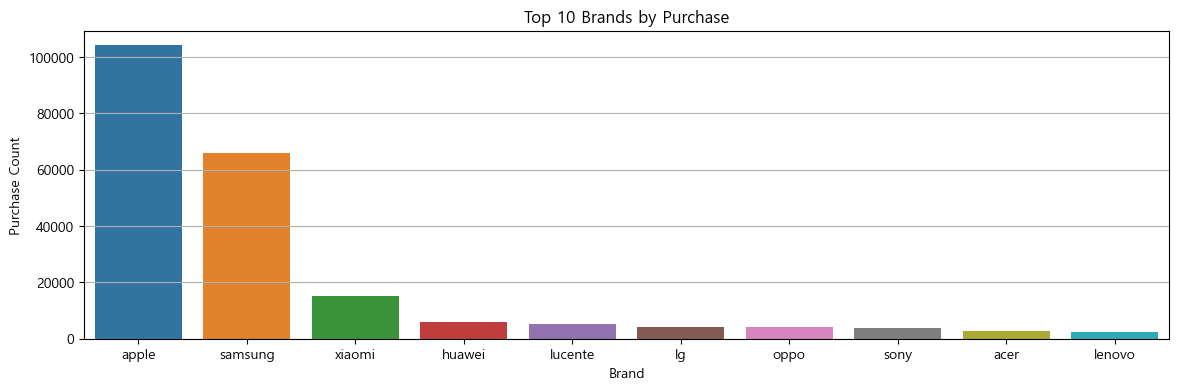

In [20]:
# purchase 별 브랜드 top 10
purchase = df.query('event_type=="purchase"')
top10_brand_purchase = purchase['brand'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_brand_purchase_DF = pd.DataFrame()
top10_brand_purchase_DF['brand'] = top10_brand_purchase.index
top10_brand_purchase_DF['count'] = top10_brand_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_brand_purchase_DF,x='brand',y='count')
ax.set_title('Top 10 Brands by Purchase')
ax.set_xlabel('Brand')
ax.set_ylabel('Purchase Count')

## 마케팅 지표 확립

In [23]:
# 평균 구매 전환율 -> total purchase / total view (cvr = conversion rate = 전환율)
avg_cvr_pv = (count_event_type['purchase']/count_event_type['view']) * 100 


# 평균 카트 전환율 -> total cart / total view
avg_cvr_cv = (count_event_type['cart']/count_event_type['view']) * 100 


# 평균 카트 구매 전환율 -> total cart / total view
avg_cvr_pc = (count_event_type['purchase']/count_event_type['cart']) * 100 


print('avg_cvr_pv:', avg_cvr_pv)
print('avg_cvr_cv:', avg_cvr_cv) 
print('avg_cvr_pc:', avg_cvr_pc)

avg_cvr_pv: 10.743408307238678
avg_cvr_cv: 18.07556230429008
avg_cvr_pc: 59.43609458107325


# 2차 데이터 가공 기준 분석

In [10]:
# 2차가공 데이터 load
df = pd.read_csv('df_user_id_v3.csv', index_col=0)

df.head(5)

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,weekday_max,time_max,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,category_code_max,category_code_min,CV,PC,PV,VS,CS,PS,group
0,518827547,1,4,4,3885.56,1,9,1,1,1,Wednesday,9~12,971.39,971.390000,971.390000,1,971.39,971.39,1,electronics,electronics,400.0,100.0,400.0,1.000000,4.0,4.0,1
1,531057019,1,3,3,1414.88,3,7,1,1,1,Sunday,9~12,643.23,471.626667,471.626667,2,643.23,128.42,1,electronics,electronics,300.0,100.0,300.0,0.333333,1.0,1.0,1
2,567382227,1,2,3,1481.82,2,6,1,1,1,Saturday,12~15,493.94,493.940000,493.940000,1,493.94,493.94,1,electronics,electronics,200.0,150.0,300.0,0.500000,1.0,1.5,1
3,554826403,1,1,2,1437.75,1,4,1,1,2,Saturday,15~18,1347.99,1347.990000,718.875000,2,1347.99,89.76,2,electronics,country_yard,100.0,200.0,200.0,1.000000,1.0,2.0,1
4,570809877,1,1,2,2665.34,1,4,1,1,1,Wednesday,3~6,1332.67,1332.670000,1332.670000,1,1332.67,1332.67,1,electronics,electronics,100.0,200.0,200.0,1.000000,1.0,2.0,1


### 그룹별 총 매출액

Text(0, 0.5, 'Total Revenue')

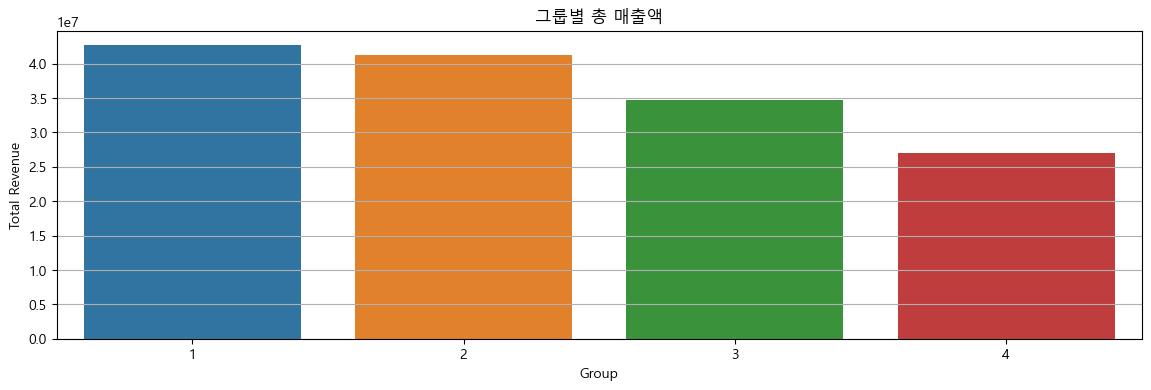

In [25]:
# 그룹별 총 매출액 확인
df.query('group == 1')['t_purchase'].sum(), df.query('group == 2')['t_purchase'].sum(), df.query('group == 3')['t_purchase'].sum(), df.query('group == 4')['t_purchase'].sum()

# 데이터 프레임 생성
group_t_purchase_sum = pd.DataFrame({'group' : [1,2,3,4],
                                    't_purchase_sum' : [42636692, 41195499, 34651007, 26978370] })

# bar graph 생성
plt.figure()
ax = sns.barplot(data=group_t_purchase_sum,x='group',y='t_purchase_sum')
ax.set_title('그룹별 총 매출액')
ax.set_xlabel('Group')
ax.set_ylabel('Total Revenue')

### 그룹별 총 판매수

Text(0, 0.5, 'Total Sales Count')

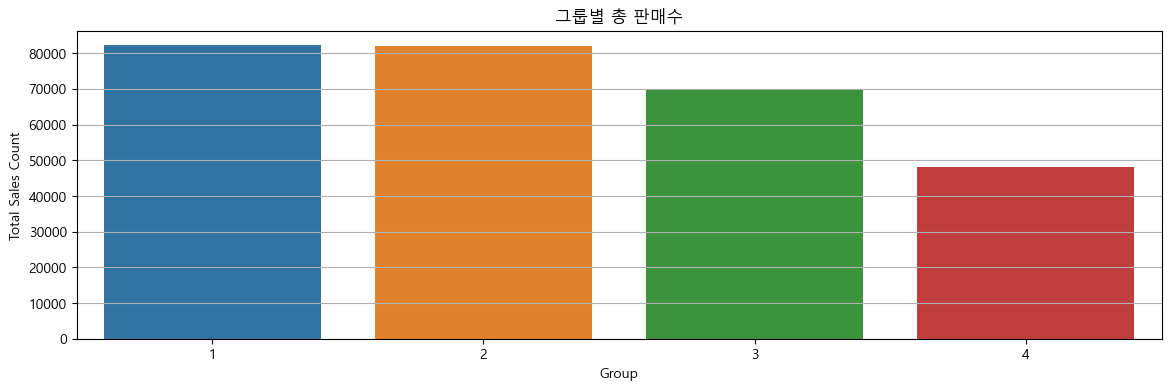

In [26]:
# 그룹별 총 판매수 확인
df.query('group == 1')['c_purchase'].sum(), df.query('group == 2')['c_purchase'].sum(), df.query('group == 3')['c_purchase'].sum(), df.query('group == 4')['c_purchase'].sum()

# 데이터 프레임 생성
group_c_purchase_sum = pd.DataFrame({'group' : [1,2,3,4],
                                    'c_purchase_sum' : [82159, 82034, 69821, 48132] })

# bar graph 생성
plt.figure()
ax = sns.barplot(data=group_c_purchase_sum,x='group',y='c_purchase_sum')
ax.set_title('그룹별 총 판매수')
ax.set_xlabel('Group')
ax.set_ylabel('Total Sales Count')

### 그룹별 총 행동수

Text(0, 0.5, 'Total number_behavior')

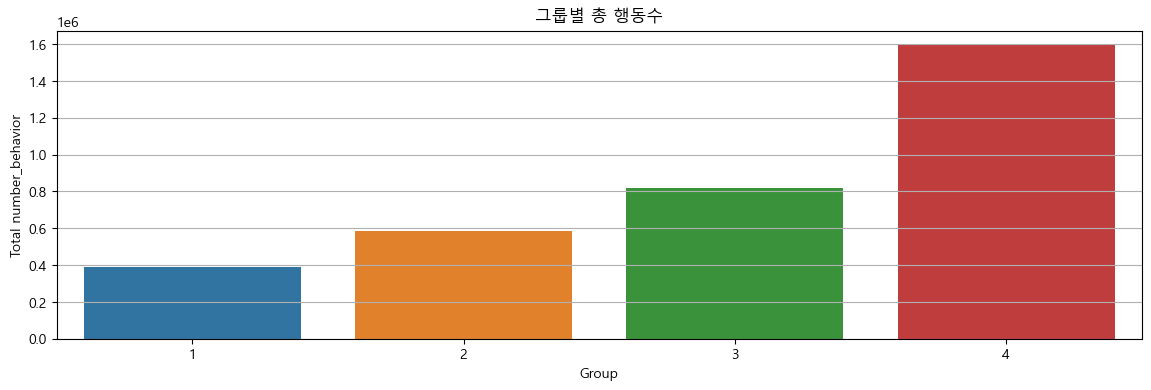

In [27]:
# 그룹별 총 행동수 확인
df.query('group == 1')['number_behavior'].sum(), df.query('group == 2')['number_behavior'].sum(), df.query('group == 3')['number_behavior'].sum(), df.query('group == 4')['number_behavior'].sum()

# 데이터 프레임 생성
group_number_behavior = pd.DataFrame({'group' : [1,2,3,4],
                                    'number_behavior' : [390002, 582832, 817561, 1592803] })

# bar graph 생성
plt.figure()
ax = sns.barplot(data=group_number_behavior,x='group',y='number_behavior')
ax.set_title('그룹별 총 행동수')
ax.set_xlabel('Group')
ax.set_ylabel('Total number_behavior')

### 그룹별 총 세션수

Text(0, 0.5, 'Total Session')

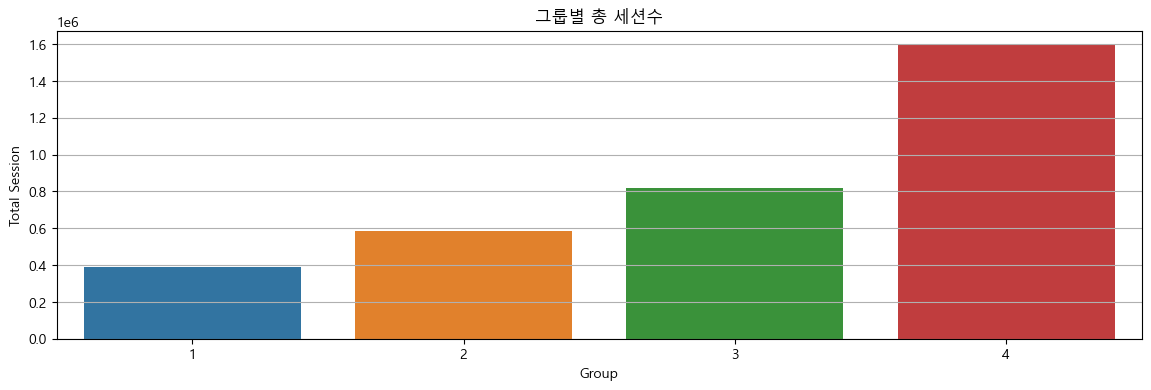

In [29]:
# 그룹별 총 세션수 확인
df.query('group == 1')['user_session_unique'].sum(), df.query('group == 2')['user_session_unique'].sum(), df.query('group == 3')['user_session_unique'].sum(), df.query('group == 4')['user_session_unique'].sum()

# 데이터 프레임 생성
group_user_session_unique = pd.DataFrame({'group' : [1,2,3,4],
                                    'user_session_unique' : [390002, 582832, 817561, 1592803] })

# bar graph 생성
plt.figure()
ax = sns.barplot(data=group_user_session_unique, x='group',y='user_session_unique')
ax.set_title('그룹별 총 세션수')
ax.set_xlabel('Group')
ax.set_ylabel('Total Session')

네개의 그룹은 행동(행동 및 세션)과 판매(판매금액 및 판매액수)간 역의 상관 관계를 보이고 있다. <br>
상위 그룹일수록 적게보고 많은 금액을 지출하는 반면 하위 그룹일수록 많이 보고 적은 금액을 지출한다.

### PRICE 히스토그램

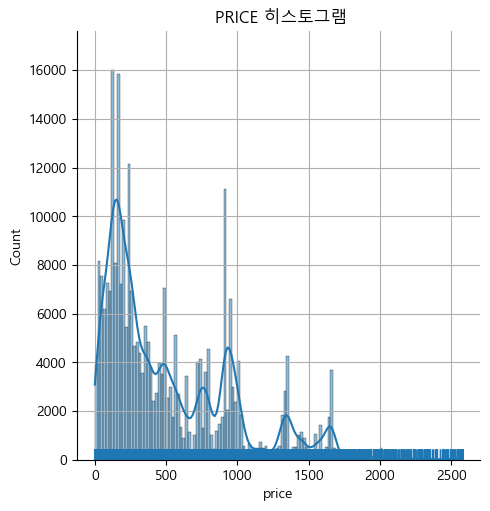

In [40]:
df_purchase = df.query('event_type == "purchase"')
sns.displot(data=df_purchase, x='price', kde=True, rug=True) #kde=True는 데이터의 높이 선  #rug=True는 데이터의 집중도 밑바닥

plt.title(" PRICE 히스토그램")
plt.show()

판매액 기준 상위 10%의 샘플 그룹의 제풉 구익 가격 구간은 2500달러 선까지 분포되어 있다. 가장 많이 판매되는 구간은 0~500달러 수준이고 그 외 1000달러 내외 구간과 1500달러 내외 구간이 두드러지게 판매되는 것을 확인할 수 있다. 이는 전자제품 카테고리가 해당 표본에서 가장 많이 팔리고 있고 해당 카테고리의 가격 구간이 이외같이 분포되어 있음을 확인할 수 있다.

### 제품가격 BOXPLOT 

<AxesSubplot: xlabel='group', ylabel='purchase_price_avg'>

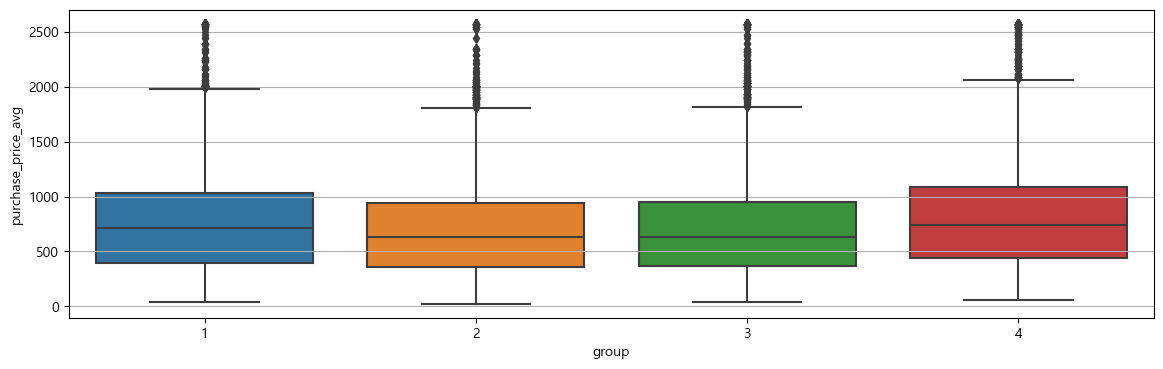

In [5]:
sns.boxplot(data=df, x='group', y='purchase_price_avg')

그룹 간 평균 구매 제품가격 분포 차이를 구했음. 각 그룹별로 500달러에서 1000달러 사이의 제품을 구매하는 것을 확인할 수 있고 최상위와 차상위 그룹의 구매제품의 평균 가격이 더욱 넓은 범위에 분포하고 있는 것을 확인할 수 있음.

### REG PLOT (VIEW & PURCHASE)

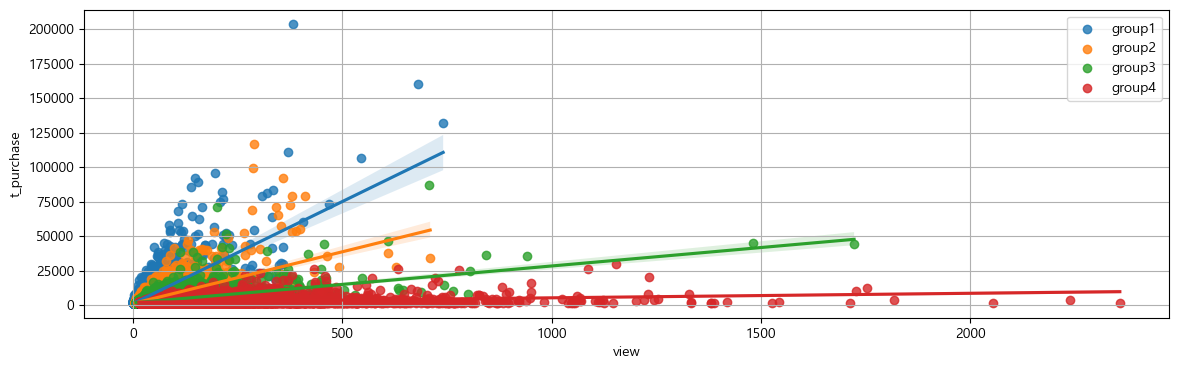

In [8]:
df_UID = pd.read_csv('df_per_user_id.csv', index_col=0)

pd.set_option('display.max_columns', None)

#view가 0인 이상치 제거
df_UID_view0_removed = df_UID.query('view!=0')

df_1 = df_UID_view0_removed.sort_values(by='PV',ascending=False)[:len(df_UID_view0_removed)//4]
df_2 = df_UID_view0_removed.sort_values(by='PV',ascending=False)[len(df_UID_view0_removed)//4:len(df_UID_view0_removed)//2]
df_3 = df_UID_view0_removed.sort_values(by='PV',ascending=False)[len(df_UID_view0_removed)//2:(len(df_UID_view0_removed)//4)*3]
df_4 = df_UID_view0_removed.sort_values(by='PV',ascending=False)[(len(df_UID_view0_removed)//4)*3:]


#PV 그룹별 view와 총 구입액 상관도 Regplot

sns.regplot(data=df_1, x='view', y='t_purchase', fit_reg=True, label = 'group1')
sns.regplot(data=df_2, x='view', y='t_purchase', fit_reg=True, label = 'group2')
sns.regplot(data=df_3, x='view', y='t_purchase', fit_reg=True, label = 'group3')
sns.regplot(data=df_4, x='view', y='t_purchase', fit_reg=True, label = 'group4')

plt.legend() 

상위 그룹일수록 상품을 보는 횟수와 총 구매금액의 상관관계가 더욱 크다. 최상위 그룹은 많이 볼수록 총 구매금액이 높아지는 반면 최하위 그룹은 많이 보아도 많은 금액을 지불하지 않는다.
PV기준 타겟마케팅 방안을 고려할때 상위그룹으로 갈수록 최대한 많은 제품들을 열람하게 유도하는 전략이 고효율 전략일 것으로 짐작해볼 수 있다.
그룹1과 그룹2에 대한 마케팅 방안으로 위의 전략을 제시한다.